In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from cartiflette.s3 import download_vectorfile_url_all

/home/cathu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Limites des communes de l'île de France

In [2]:
communes = download_vectorfile_url_all(
    crs = 4326,
    borders="COMMUNE_ARRONDISSEMENT",
    values = ["75","77","78","91", "92", "93", "94","95"],
    vectorfile_format="topojson",
    filter_by="DEPARTEMENT",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=75/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 40.1kiB [00:00, 3.17MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=77/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 1.57MiB [00:00, 27.2MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=78/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 581kiB [00:00, 14.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=91/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 483kiB [00:00, 13.4MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=92/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 63.0kiB [00:00, 6.45MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=93/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 120kiB [00:00, 8.84MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=94/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 111kiB [00:00, 8.26MiB/s]


https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=COMMUNE_ARRONDISSEMENT/crs=4326/DEPARTEMENT=95/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 372kiB [00:00, 14.7MiB/s]


### Communes dotées de station vélib en île de France

In [4]:
com = communes[((communes['INSEE_DEP'].isin(["75", "92"])) & 
                (~communes['INSEE_COG'].isin(['92002', '92019', '92060', '92047', '92076','92033'])) 
                | (communes['INSEE_COG'].isin(['95018', '94081', '94041', '94037', '94076', '94002', 
                                               '94046', '94016', '94080', '94200', '94016', '94041', '94069',
                                               '94042', '94052', '94022', '94100', '94017', '93006', '93055', 
                                               '93001', '93070', '93066', '93048', '94033', '93063', '93053', 
                                               '93063', '93008', '93064', '94018'])))]

L'Île-de-France fait partie des 18 régions que compte la France Métropolitaine. Elle comprend 8 départements : 
    - Paris (75)
    - les Hauts-de-Seine (92)
    - la Seine-Saint-Denis (93)
    - le Val-de-Marne (94)
    - la Seine-et-Marne (77)
    - les Yvelines (78)
    - l'Essonne (91)
    - le Val-d'Oise (95);
et 1281 communes.

### Analyse de la répartition spatiale des bornes vélib

In [16]:
# velib = gpd.read_file('velib-disponibilite-en-temps-reel .geojson')

/home/cathu/.local/lib/python3.10/site-packages/geopandas/io/file.py:364: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  as_dt = pd.to_datetime(df[k], errors="ignore")


In [10]:
url = "https://opendata.paris.fr/explore/dataset/velib-emplacement-des-stations/download/?format=geojson&timezone=Europe/Berlin&lang=fr"

In [11]:
velib = gpd.read_file(url)

In [18]:
velib.sample(n=15)

,stationcode,name,is_installed,capacity,numdocksavailable,numbikesavailable,mechanical,ebike,is_renting,is_returning,duedate,nom_arrondissement_communes,code_insee_commune,geometry
577,22002,Argenson - Château,OUI,25,9,15,14,1,OUI,OUI,2023-12-05 15:05:18+00:00,Neuilly-sur-Seine,None,POINT (2.26420 48.88856)
791,15005,Place Jacques et Thérèse Tréfouël,OUI,43,41,2,2,0,OUI,OUI,2023-12-05 15:07:26+00:00,Paris,None,POINT (2.31257 48.84273)
87,5020,Institut du Monde Arabe - Saint-Germain,OUI,40,7,31,28,3,OUI,OUI,2023-12-05 15:05:47+00:00,Paris,None,POINT (2.35581 48.84906)
587,12033,François Truffaut - Saint Emilion,OUI,66,23,43,38,5,OUI,OUI,2023-12-05 15:07:14+00:00,Paris,None,POINT (2.38660 48.83372)
1052,5015,Epée de Bois - Mouffetard,OUI,63,30,33,18,15,OUI,OUI,2023-12-05 15:06:48+00:00,Paris,None,POINT (2.35007 48.84151)
918,33015,Charles Tillon - Cimetière Communal,OUI,30,21,9,5,4,OUI,OUI,2023-12-05 15:04:39+00:00,Aubervilliers,None,POINT (2.39356 48.91844)
1125,13202,Place Farhat Hached,NON,0,0,0,0,0,NON,NON,2023-04-19 11:39:18+00:00,Paris,None,POINT (2.38197 48.82581)
1083,27001,Square Victor Basch,OUI,20,20,0,0,0,NON,NON,2023-06-30 17:33:37+00:00,Colombes,None,POINT (2.22892 48.91430)
248,11026,Chemin Vert - Saint-Maur,OUI,45,37,7,4,3,OUI,OUI,2023-12-05 15:06:13+00:00,Paris,None,POINT (2.38130 48.86112)
925,1007,Turbigo - Française,OUI,16,2,12,10,2,OUI,OUI,2023-12-05 15:06:40+00:00,Paris,None,POINT (2.34778 48.86359)


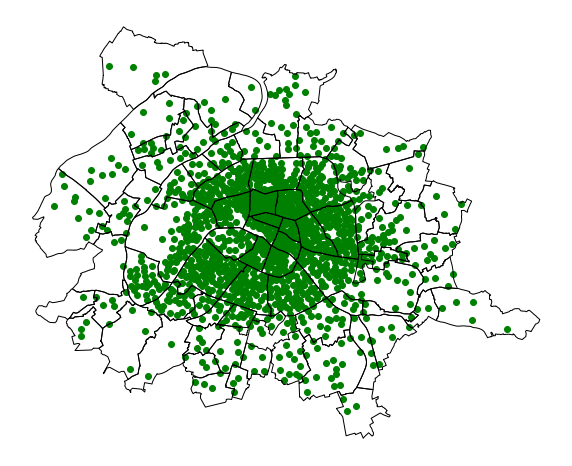

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))
velib.plot(ax = ax, color = 'green')
com.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

### Analyse de la densité des pistes cyclabes

In [21]:
a_velo= gpd.read_file('amenagements-velo-en-ile-de-france.geojson')

In [22]:
a_velo.crs

a_velo.sample(n=2)

,osm_id,nom_com,sens_voit,ag,panneaux,moyenn_ech,revetement,highway,insee_com,nom_voie,longueur,petite_ech,nv,ad,geometry
53892,168923663.0,Villeneuve-la-Garenne,NC,autre chemin velo uni,None,41,concrete,path,92078,None,33,4,hors voirie,autre chemin velo uni,"LINESTRING (2.32089 48.94310, 2.32076 48.94313..."
68428,126827171.0,Houdan,UNIQUE,None,None,12,None,secondary,78310,None,41,1,None,piste uni,"LINESTRING (1.60147 48.79446, 1.60127 48.79446..."


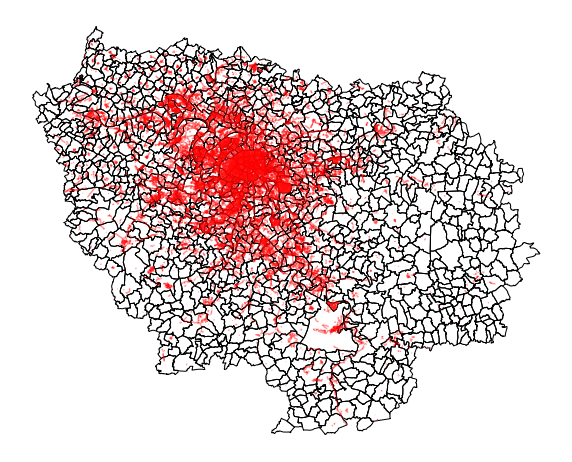

In [20]:
fig,ax = plt.subplots(figsize=(10, 10))
a_velo.plot(ax = ax, color = 'red', alpha = 0.4, zorder=2)
communes.plot(ax = ax, zorder=1, edgecolor = "black", facecolor="none")
ax.set_axis_off()

Sur la figure, on observe que la densité des pistes cyclabes diminue au fur et à mésure qu'on s'éloigne de la petite courone

un préalable au calcul des surfaces est le choix du système de projection adéquat. Dans notre cas , il s'agit de convertir les données aux système de projection Lambert 93 qui est le plus appropié.

In [178]:
communes['surface'] = communes.to_crs(2154).area

In [179]:
communes.sort_values('surface', ascending = False)

,id,ID,NOM,NOM_M,INSEE_COM,STATUT,POPULATION,INSEE_CAN,INSEE_ARR,INSEE_DEP,INSEE_REG,SIREN_EPCI,source,insee_com,geometry,surface
111,COMMUNE_0000000009739723,NaN,Fontainebleau,FONTAINEBLEAU,77186,Sous-préfecture,15696,07,4,77,11,200072346,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77186,"POLYGON ((2.74740 48.48329, 2.74783 48.48327, ...",1.722864e+08
148,COMMUNE_0000002200276627,NaN,Saint-Germain-en-Laye,SAINT-GERMAIN-EN-LAYE,78551,Sous-préfecture,44806,16,3,78,11,200058519,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78551,"POLYGON ((2.07077 48.94649, 2.07138 48.94676, ...",5.313401e+07
135,COMMUNE_0000002200276622,NaN,Chenoise-Cucharmoy,CHENOISE-CUCHARMOY,77109,Commune simple,1640,18,3,77,11,200037133,IGN:EXPRESS-COG-CARTO-TERRITOIRE,77109,"POLYGON ((3.13963 48.59977, 3.13951 48.59983, ...",4.874811e+07
229,COMMUNE_0000000009738401,NaN,Sonchamp,SONCHAMP,78601,Commune simple,1600,14,2,78,11,200073344,IGN:EXPRESS-COG-CARTO-TERRITOIRE,78601,"POLYGON ((1.83232 48.56349, 1.83260 48.56506, ...",4.634931e+07
152,COMMUNE_0000000009739738,NaN,Étampes,ETAMPES,91223,Sous-préfecture,25629,08,1,91,11,200017846,IGN:EXPRESS-COG-CARTO-TERRITOIRE,91223,"POLYGON ((2.23350 48.39672, 2.23293 48.39656, ...",4.596232e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,COMMUNE_0000000009736527,NaN,Saint-Mandé,SAINT-MANDE,94067,Commune simple,22377,23,2,94,11,200054781/200057941,IGN:EXPRESS-COG-CARTO-TERRITOIRE,94067,"POLYGON ((2.41900 48.84939, 2.41900 48.84935, ...",9.057590e+05
155,COMMUNE_0000000009734016,NaN,Gouzangrez,GOUZANGREZ,95282,Commune simple,160,16,3,95,11,200035970,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95282,"POLYGON ((1.90588 49.11131, 1.90559 49.11143, ...",7.725902e+05
181,COMMUNE_0000000009735023,NaN,Margency,MARGENCY,95369,Commune simple,2846,15,2,95,11,200056380,IGN:EXPRESS-COG-CARTO-TERRITOIRE,95369,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...",7.250545e+05
11,COMMUNE_0000000009736027,NaN,Le Pré-Saint-Gervais,LE PRE-SAINT-GERVAIS,93061,Commune simple,17351,15,1,93,11,200054781/200057875,IGN:EXPRESS-COG-CARTO-TERRITOIRE,93061,"POLYGON ((2.41151 48.88322, 2.41148 48.88315, ...",7.027441e+05


In [32]:
a_velo['longueur'].describe()

count    112217.000000
mean        126.315959
std         174.519817
min           0.000000
25%          24.000000
50%          70.000000
75%         161.000000
max        3984.000000
Name: longueur, dtype: float64

### Décompte des aménagements cyclables par communes

In [34]:
a_velo = a_velo [a_velo ['longueur'] != 0]

In [55]:
a_velo['piste'] = a_velo['longueur'].apply(lambda x: 0 if x == 0 else 1)

In [102]:
y=a_velo.groupby('insee_com').sum(numeric_only = True).sort_values('piste', ascending = False)
y

,osm_id,longueur,piste
insee_com,,,
75112,8.194662e+11,201748,1994
75116,6.542635e+11,228240,1981
95127,8.541363e+11,124902,1549
75113,5.319723e+11,137731,1483
75115,4.767768e+11,148909,1440
...,...,...,...
77525,1.406556e+08,166,1
95046,6.241011e+08,139,1
77437,7.261289e+08,152,1


In [63]:
print(y.columns)

Index(['osm_id', 'longueur', 'piste'], dtype='object')


In [57]:
y.describe()

,osm_id,longueur,piste
count,1.005000e+03,1005.000000,1005.000000
mean,4.289913e+10,14104.276617,110.153234
std,8.424072e+10,24139.660522,218.183793
min,2.310947e+07,2.000000,1.000000
25%,3.040353e+09,1476.000000,8.000000
50%,1.227068e+10,5293.000000,30.000000
75%,4.555888e+10,15626.000000,110.000000
max,8.541363e+11,228240.000000,1994.000000


Les pistes cyclables en île de France sont présentes dans 1005 arrondissements sur les. 

Text(0.5, 1.0, 'Distribution des pistes cyclables dans les communes')

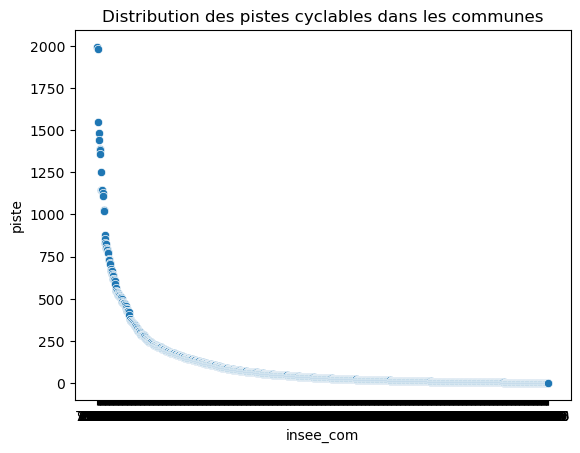

In [70]:
sns.scatterplot(y['piste'])
plt.title('Distribution des pistes cyclables dans les communes')

In [181]:
communes.rename(columns={'INSEE_COG': 'insee_com'}, inplace=True)

In [182]:
base = communes[['insee_com', 'POPULATION', 'surface', 'geometry']].merge(y, how='outer', on='insee_com')

In [183]:
base.groupby('insee_com').sum(numeric_only = True).sort_values('piste', ascending = False)

,POPULATION,surface,osm_id,longueur,piste
insee_com,,,,,
75112,139297,1.638084e+07,8.194662e+11,201748.0,1994.0
75116,165523,1.640971e+07,6.542635e+11,228240.0,1981.0
95127,65911,1.456692e+07,8.541363e+11,124902.0,1549.0
75113,180005,7.138222e+06,5.319723e+11,137731.0,1483.0
75115,230981,8.472060e+06,4.767768e+11,148909.0,1440.0
...,...,...,...,...,...
77072,685,1.826055e+07,0.000000e+00,0.0,0.0
77076,755,1.005856e+07,0.000000e+00,0.0,0.0
78034,967,4.416990e+06,0.000000e+00,0.0,0.0


de l'analyse de ce tableau, on constate que certaines communes, bien qu'ayant une superficie très grandes, ne dispose pas de piste cyclable.

In [157]:
base = gpd.GeoDataFrame(base, geometry='geometry')

##### Répartition des pistes cyclabes en île de France

/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


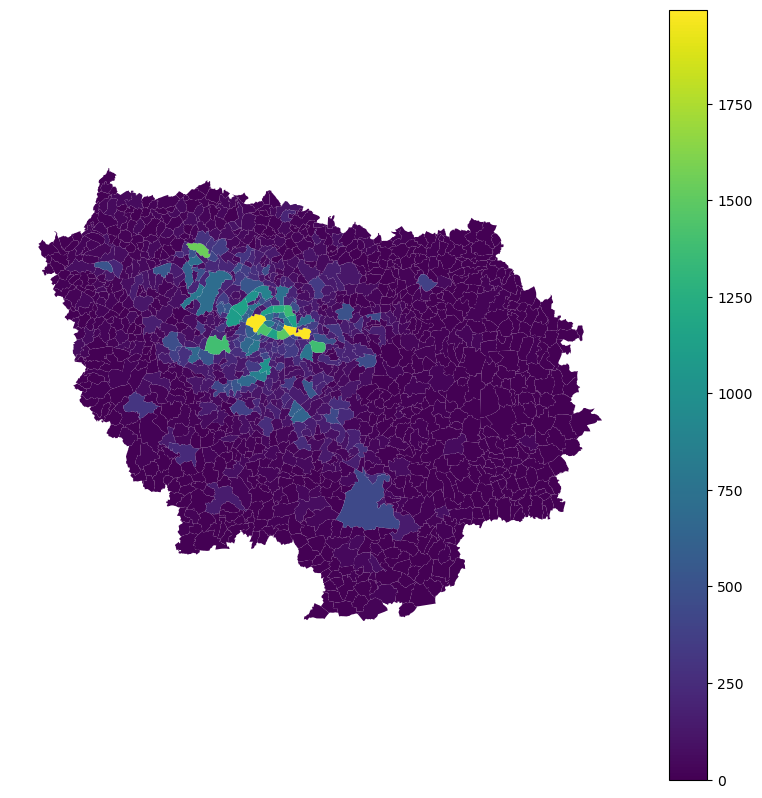

In [156]:
fig, ax = plt.subplots(figsize=(10, 10))
dissolved = base.dissolve(by='insee_com', aggfunc='sum').reset_index()
dissolved.plot(ax=ax, column="piste", legend=True)
ax.set_axis_off()
legend = ax.get_legend()
plt.show()

Sur la figure, on observe que les pistes cyclables sont concentrées autours du département 75. Plus on s'éloigne plus le nombre diminue.

In [184]:
base['long_surf']= base['longueur']/base['surface']

In [185]:
base

,insee_com,POPULATION,surface,geometry,osm_id,longueur,piste,long_surf
0,75103,34025,1.170282e+06,"POLYGON ((2.35016 48.86199, 2.35019 48.86203, ...",7.143109e+10,26150.0,286.0,0.022345
1,75102,21595,9.923087e+05,"POLYGON ((2.34792 48.87069, 2.34827 48.87062, ...",7.195642e+10,25006.0,293.0,0.025200
2,75104,29131,1.596122e+06,"POLYGON ((2.36849 48.85580, 2.36873 48.85482, ...",1.881359e+11,42547.0,566.0,0.026656
3,75105,58227,2.543140e+06,"POLYGON ((2.33666 48.83967, 2.33672 48.84011, ...",2.135673e+11,48695.0,632.0,0.019148
4,75106,40303,2.152364e+06,"POLYGON ((2.33292 48.85934, 2.33339 48.85924, ...",1.039468e+11,42607.0,474.0,0.019795
...,...,...,...,...,...,...,...,...
1282,95052,9504,5.602555e+06,"POLYGON ((2.32006 49.12485, 2.31987 49.12481, ...",4.497259e+09,2625.0,8.0,0.000469
1283,95462,323,1.232440e+07,"POLYGON ((1.74171 49.13790, 1.74170 49.13777, ...",1.970755e+10,4001.0,48.0,0.000325
1284,95369,2846,7.250545e+05,"POLYGON ((2.29014 48.99680, 2.28979 48.99688, ...",2.099399e+10,3347.0,45.0,0.004616
1285,95612,4567,3.994499e+06,"POLYGON ((2.44337 49.01131, 2.44343 49.01137, ...",1.376677e+10,2758.0,17.0,0.000690


##### Répartition des pistes cyclabes en fonction des de la superficie de l'arrondissement

/opt/mamba/lib/python3.10/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


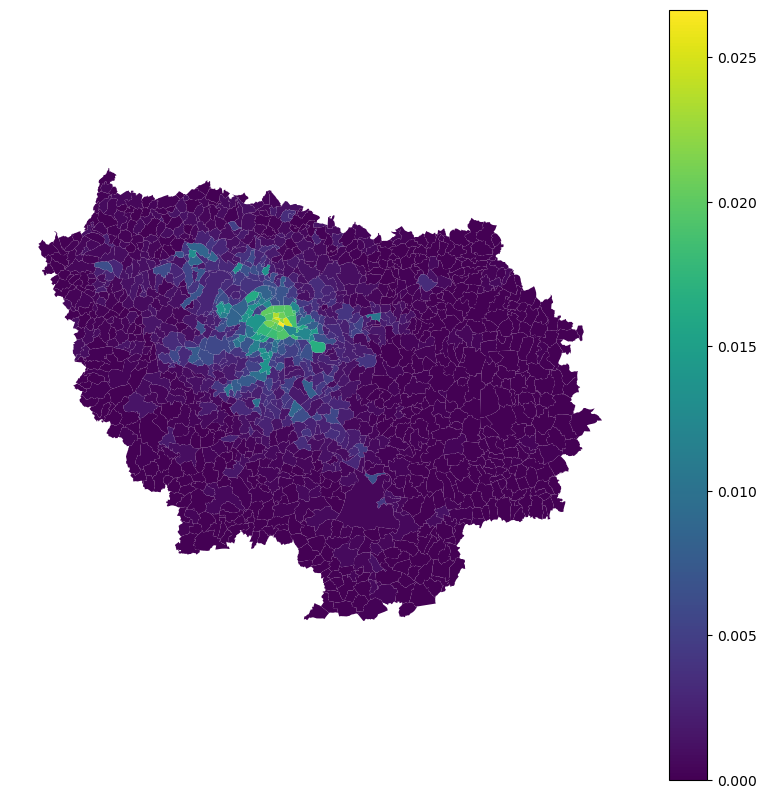

In [186]:
fig, ax = plt.subplots(figsize=(10, 10))
dissolved = base.dissolve(by='insee_com', aggfunc='sum').reset_index()
dissolved.plot(ax=ax, column="long_surf", legend=True)
ax.set_axis_off()
legend = ax.get_legend()
plt.show()

L

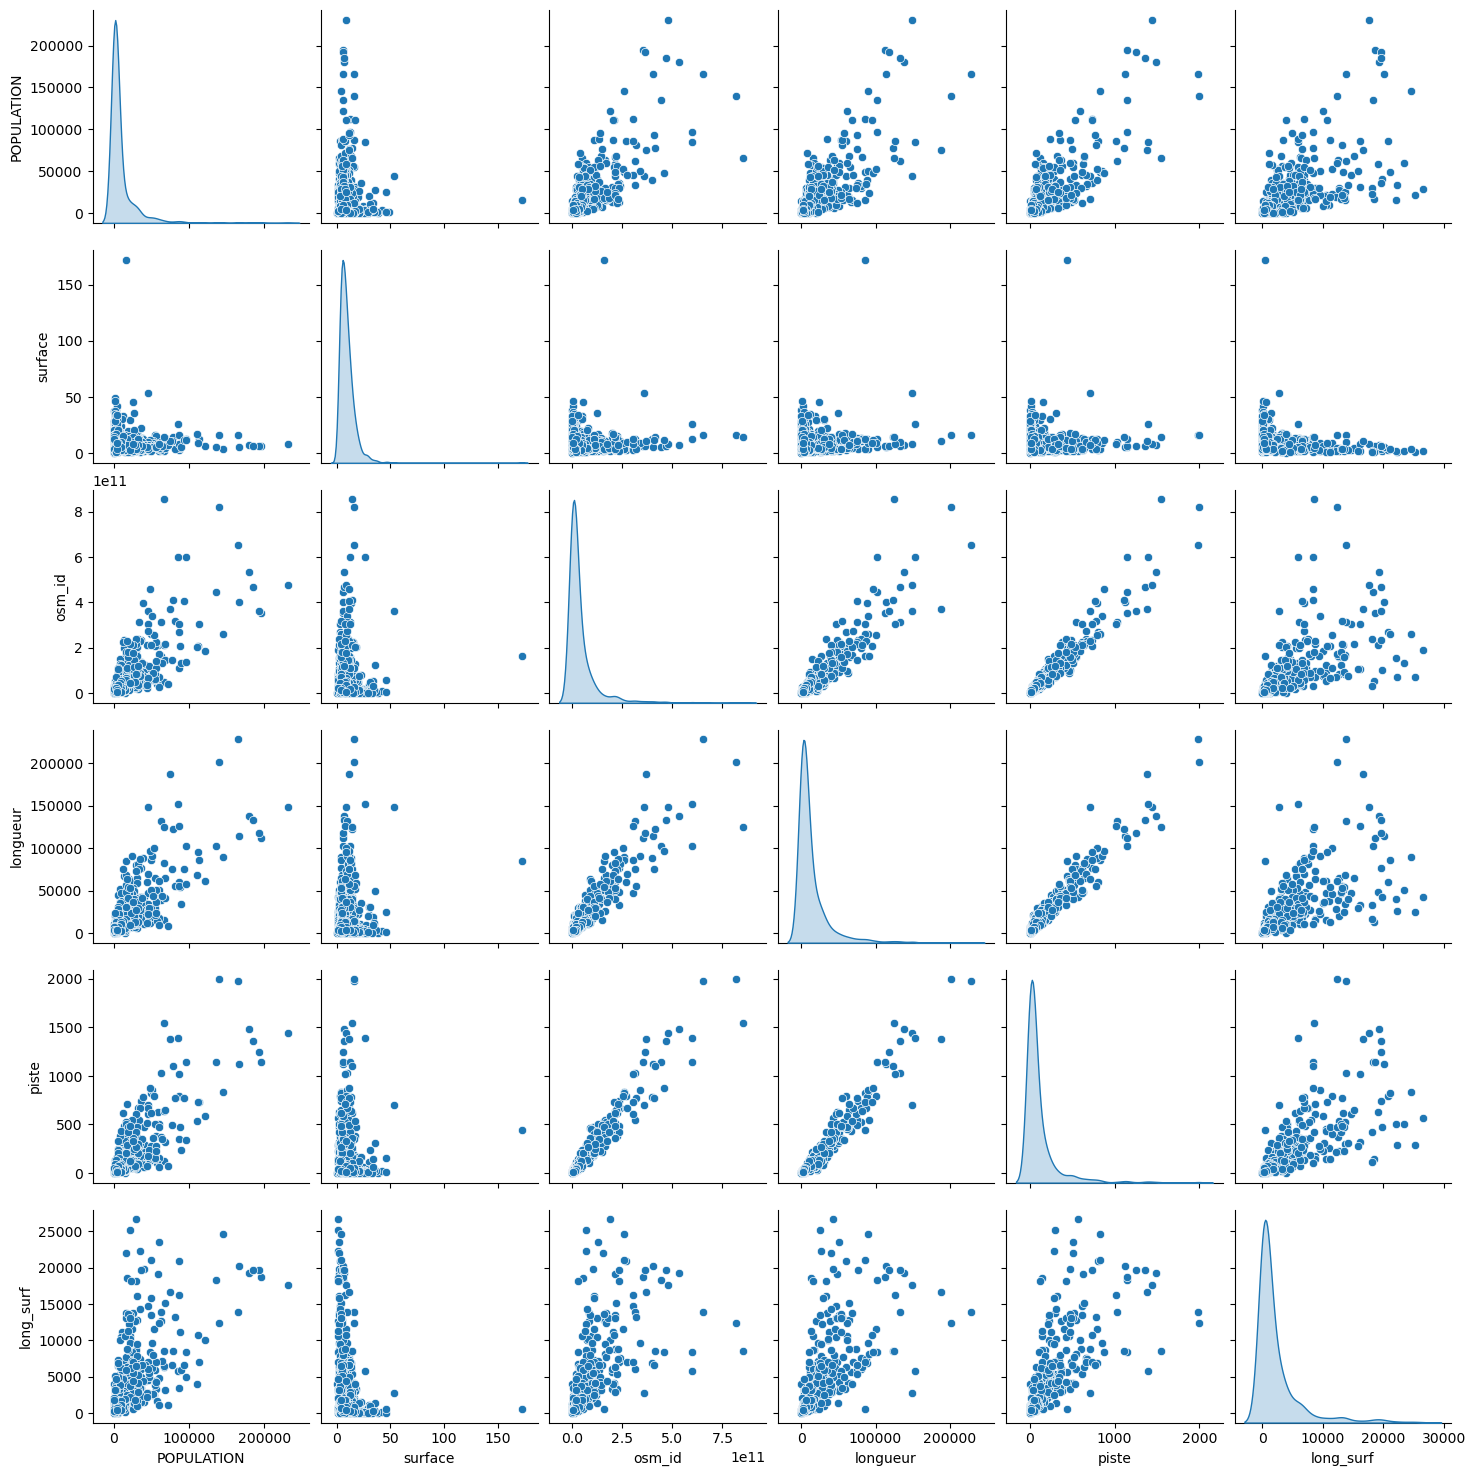

In [169]:
sns.pairplot(base, diag_kind='kde')

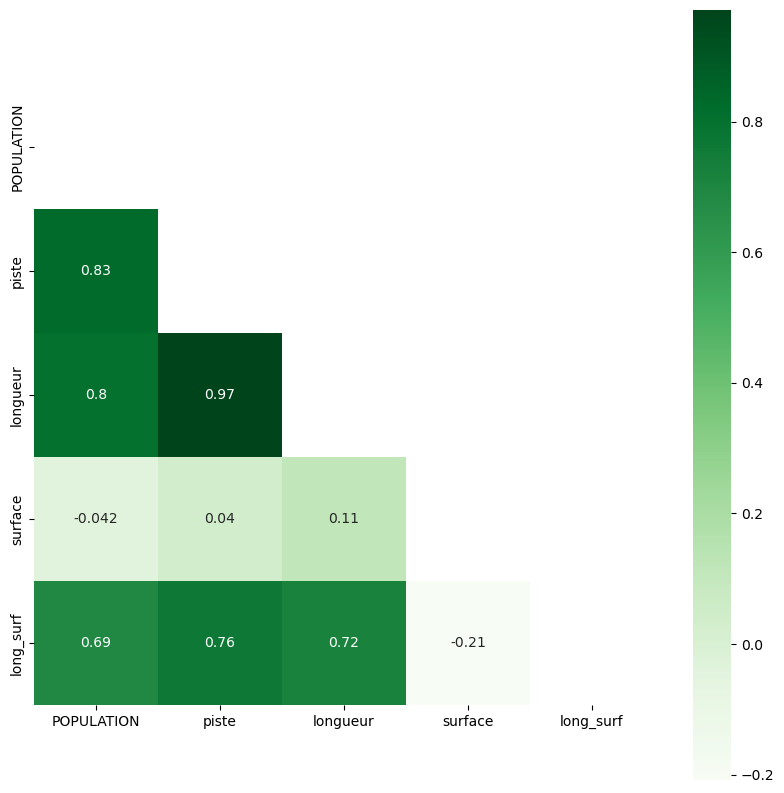

In [176]:
plt.figure(figsize=(10, 10))
sns.heatmap(base[['POPULATION','piste','longueur','surface','long_surf']].corr(), cmap='Greens',square=True, mask=mask, cbar=True,annot=True);